In [10]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

In [ ]:
# Set plot style using Seaborn's styling system
sns.set(style='whitegrid', palette='viridis')

In [12]:
# Load the Our World in Data COVID-19 dataset
df = pd.read_csv('owid-covid-data.csv')

In [13]:
# Preview data
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst 5 Rows:")
print(df.head())

Dataset Shape: (302512, 67)

Columns: ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_

In [14]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
iso_code                                        0
continent                                   14352
location                                        0
date                                            0
total_cases                                 35741
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       292217
excess_mortality_cumulative                292217
excess_mortality                           292217
excess_mortality_cumulative_per_million    292217
Length: 67, dtype: int64


In [15]:
# Key columns of interest
key_columns = ['date', 'location', 'total_cases', 'new_cases', 'total_deaths', 
            'new_deaths', 'total_vaccinations', 'population', 'iso_code']

In [16]:
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

In [17]:
#countries filtering
countries = ['Kenya', 'Tanzania', 'India']
df_filtered = df[df['location'].isin(countries)][key_columns]


In [18]:
#handling of missing values
numeric_cols = ['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_vaccinations']
df_filtered[numeric_cols] = df_filtered[numeric_cols].fillna(method='ffill')

/tmp/ipykernel_13797/2565104454.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered[numeric_cols] = df_filtered[numeric_cols].fillna(method='ffill')


In [19]:
# Drop rows with missing critical values.
df_filtered = df_filtered.dropna(subset=['date', 'location'])


In [20]:
# Calculate death rate and vaccination rate
df_filtered['death_rate'] = df_filtered['total_deaths'] / df_filtered['total_cases']
df_filtered['vaccination_rate'] = (df_filtered['total_vaccinations'] / df_filtered['population']) * 100

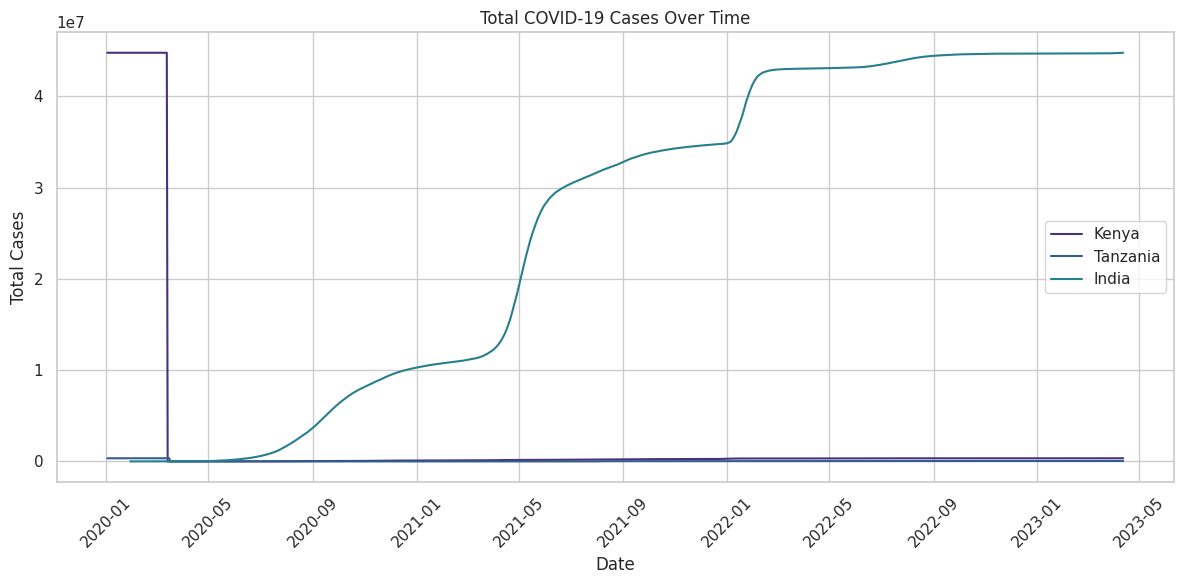

In [21]:
# Plot total cases over time
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('total_cases_over_time.png')
plt.show()

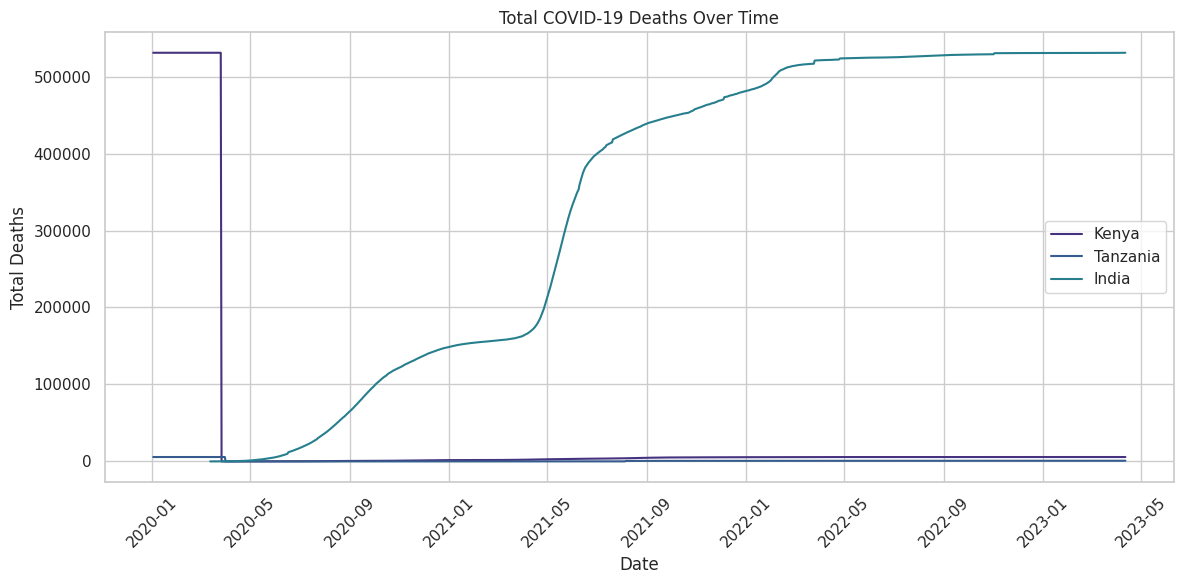

In [22]:
# Plot total deaths over time
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)
plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('total_deaths_over_time.png')
plt.show()

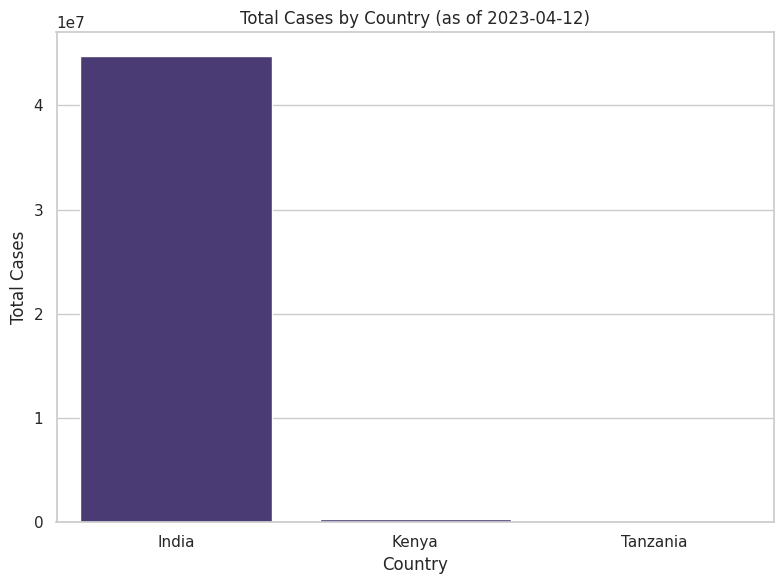

In [23]:
# Bar chart. Total cases by country using the latest dates
latest_date = df_filtered['date'].max()
latest_data = df_filtered[df_filtered['date'] == latest_date]
plt.figure(figsize=(8, 6))
sns.barplot(x='location', y='total_cases', data=latest_data)
plt.title(f'Total Cases by Country (as of {latest_date.date()})')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.tight_layout()
plt.savefig('total_cases_by_country.png')
plt.show()

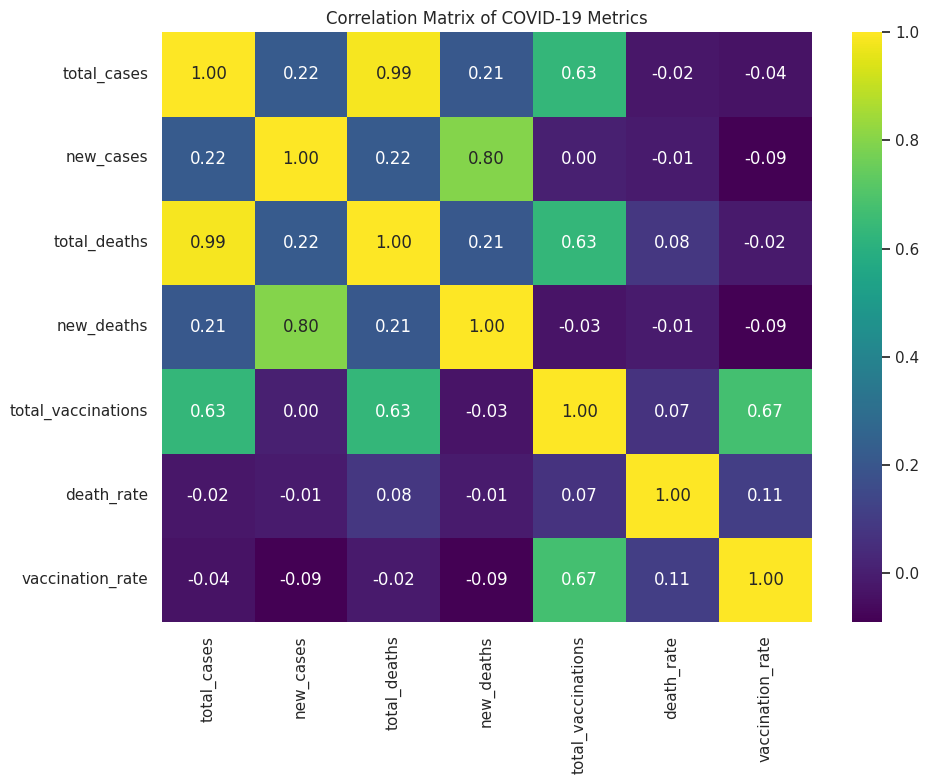

In [24]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df_filtered[numeric_cols + ['death_rate', 'vaccination_rate']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix of COVID-19 Metrics')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()

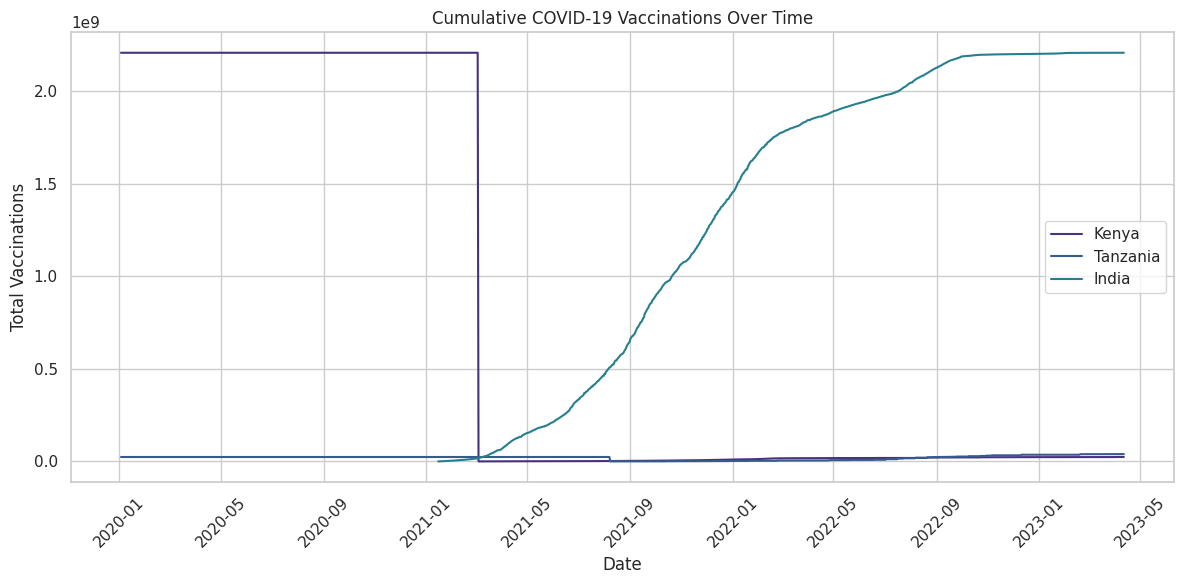

In [25]:
#cumulative vaccinations over time
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)
plt.title('Cumulative COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('total_vaccinations_over_time.png')
plt.show()

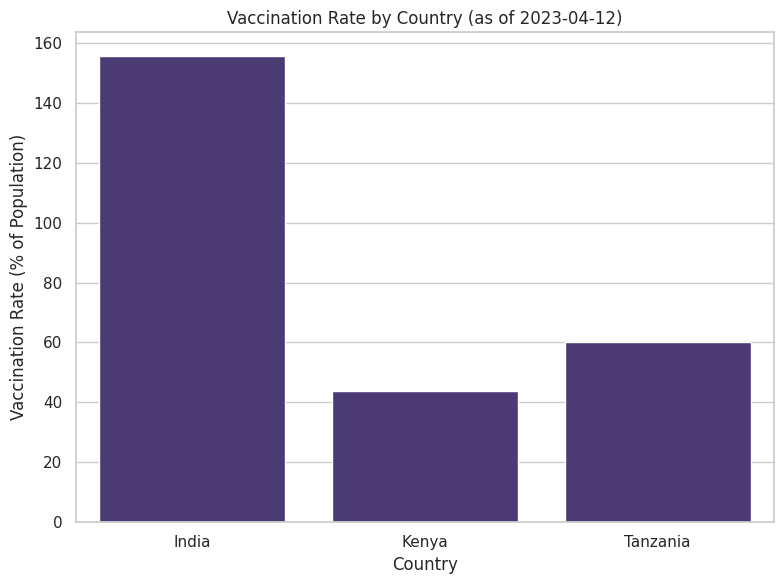

In [26]:

# Bar chart. Vaccination rate by country (latest date)
plt.figure(figsize=(8, 6))
sns.barplot(x='location', y='vaccination_rate', data=latest_data)
plt.title(f'Vaccination Rate by Country (as of {latest_date.date()})')
plt.xlabel('Country')
plt.ylabel('Vaccination Rate (% of Population)')
plt.tight_layout()
plt.savefig('vaccination_rate_by_country.png')
plt.show()


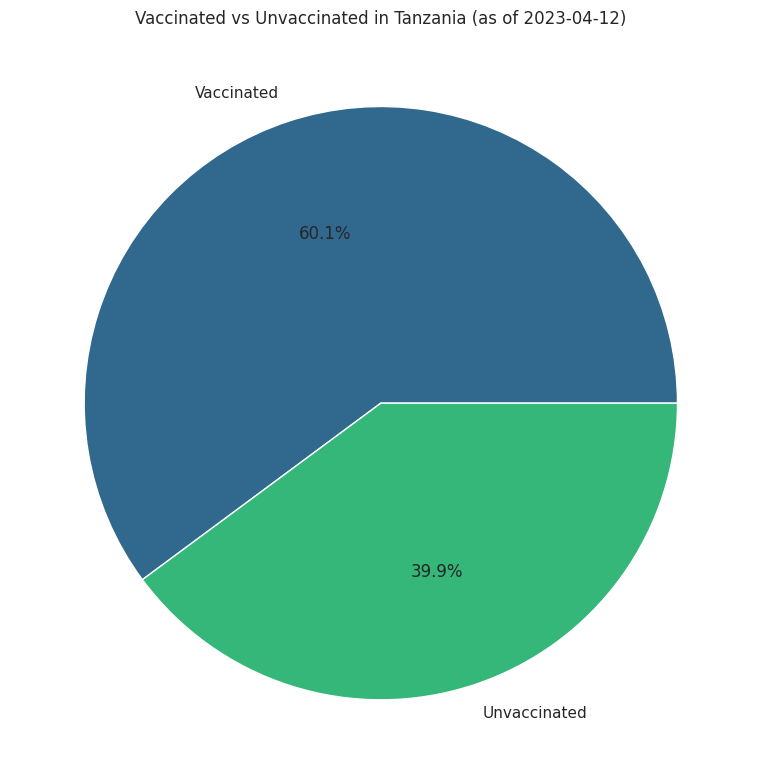

In [29]:
# Pie chart: Vaccinated vs unvaccinated (approximated) for Tanzania
tz_latest = latest_data[latest_data['location'] == 'Tanzania']
plt.figure(figsize=(8, 8))
plt.pie(
    [tz_latest['vaccination_rate'].iloc[0], 100 - tz_latest['vaccination_rate'].iloc[0]],
    labels=['Vaccinated', 'Unvaccinated'],
    autopct='%1.1f%%',
    colors=sns.color_palette('viridis', 2)
)
plt.title(f'Vaccinated vs Unvaccinated in Tanzania (as of {latest_date.date()})')
plt.tight_layout()
plt.savefig('vaccination_pie_chart.png')
plt.show()

# Key Insights
#
# This analysis of COVID-19 data for Kenya, Tanzania and India reveals significant trends and disparities in cases, deaths and vaccination progress. Here are the key findings;
#
# - **India’s High Case Burden**: India exhibits significantly higher total cases and deaths compared to Kenya and Tanzania, reflecting its large population and early exposure to the pandemic.
# - **Tanzania’s Limited Vaccination Data**: Tanzania’s vaccination rate is notably lower, possibly due to limited data reporting or slower rollout as seen in the pie chart showing minimal vaccinated population.
# - **Kenya’s Moderate Position**: Kenya’s case and death counts are moderate with a vaccination rate positioned between India’s higher coverage and Tanzania’s lower progress.
# - **Strong Case-Death Correlation**: The correlation heatmap indicates a strong positive relationship between total cases and deaths suggesting that higher case counts consistently lead to more fatalities.
# - **Vaccination Disparities**: Vaccination progress varies widely with India leading among the selected countries while Tanzania lags highlighting regional differences in rollout strategies or data availability.